<a href="https://colab.research.google.com/github/Mohak91/Course-on-comparative-genomics-of-bacteria/blob/main/Lab_practical_session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/comp_gen_bacteria_krea

/content/drive/MyDrive/comp_gen_bacteria_krea


#Stop codon distribution

If there are three stop codons, how many genes end in UAA, UGA and UAG?

####Storing the coordinates of all genes in M. genitalium in a data structure. Here we choose the data structure to be a dictionary.

In [3]:
GFF="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.gff"

In [4]:
#function definition
def read_gff_dictionary(gff_file):
  cds_coordinate_dictionary={} #data structure
  count=0 #key 
  with open(gff_file) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          count=count+1
          start_pos=int(line_list[3]) #fourth column
          stop_pos=int(line_list[4]) #fifth column
          #cds_coordinate_dictionary.append([start_pos,stop_pos])
          cds_coordinate_dictionary[count]=[start_pos,stop_pos]
        else:
          pass
  return cds_coordinate_dictionary

In [5]:
#function call
cds_coordinate_dictionary=read_gff_dictionary(GFF) #dictionary

####Storing the entire genome sequence of M. genitalium in a string variable.

In [6]:
FNA="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna"

In [7]:
#function definition
def read_genome_sequence(fna_file):
  sequence=""
  with open(fna_file) as file_handle:
    for line in file_handle:
      if not line.startswith(">"):
        sequence=sequence+line.strip()
  return sequence

In [8]:
#function call
sequence_string=read_genome_sequence(FNA)

####Using the above two pieces of information, let's fetch gene sequences for all the genes, one at a time. And in each iteration, note down that is the stop codon of that gene. Counting the stop codon this way will save us the space of storing all the coding sequences in a data structure.

In [9]:
#function definition
def count_stop_codons_across_genes(cds_coordinate_dictionary,sequence_string):
  taa=0
  tag=0
  tga=0
  others=0
  for key,value_list in cds_coordinate_dictionary.items():
    start_pos=value_list[0]-1 #making it zero based
    stop_pos=value_list[1]
    cds_seq=sequence_string[start_pos:stop_pos] #positive strand
    stop_codon=cds_seq[-3:] #starting from the third last position uptil the end of the string
    if stop_codon=="TAA":
      #taa=taa+1
      taa+=1
    elif stop_codon=="TAG":
      tag+=1
    elif stop_codon=="TGA":
      tga+=1
    else:
      others+=1
  return taa,tag,tga,others

In [10]:
#function call
taa,tag,tga,others = count_stop_codons_across_genes(cds_coordinate_dictionary,sequence_string)
print("Number of genes ending in TAA: %d \nNumber of genes ending in TAG: %d \nNumber of genes ending in TGA: %d \nNumber of genes ending in neither of the standard stop codons: %d\n"%(taa,tag,tga,others))

Number of genes ending in TAA: 212 
Number of genes ending in TAG: 84 
Number of genes ending in TGA: 0 
Number of genes ending in neither of the standard stop codons: 249



Why are there still genes ending in stop codons other than the three standard stop codons?

- We discussed how we have only taken the positive strand information yet. What about the negative strand? Modify the code to incorporate that information.
- Are we still left with genes that end in nucleotide sequences other than the three stop codons after we incorporate the negative strand? If yes, why?
- Try to plot the final values as bar plots, once you are satisfied with the results.
- Try taking bacterial genomes of other bacteria with different GC contents and see how the stop codon distribution changes for those genomes. (Reconcile the results with their translation table type. For example, Mycoplasma genitalium has translation table = 4 as seen in the gbff file)

##Let's make changes in the code to include strand information.

In [19]:
GFF="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.gff"

#function definition
def read_gff_dictionary(gff_file):
  cds_coordinate_dictionary={} #data structure
  count=0 #key 
  with open(gff_file) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          count=count+1
          start_pos=int(line_list[3]) #fourth column
          stop_pos=int(line_list[4]) #fifth column
          strand=line_list[6] #including strand information, seventh column
          #cds_coordinate_dictionary.append([start_pos,stop_pos])
          cds_coordinate_dictionary[count]=[start_pos,stop_pos,strand]
        else:
          pass
  return cds_coordinate_dictionary

#function call
cds_coordinate_dictionary=read_gff_dictionary(GFF) #dictionary

In [ ]:
cds_coordinate_dictionary

In [20]:
FNA="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna"

#function definition
def read_genome_sequence(fna_file):
  sequence=""
  with open(fna_file) as file_handle:
    for line in file_handle:
      if not line.startswith(">"):
        sequence=sequence+line.strip()
  return sequence

#function call
sequence_string=read_genome_sequence(FNA)

In [23]:
#function definition

def reverse_complement(sequence_string,start_pos,stop_pos):
  extracted_sequence=sequence_string[start_pos:stop_pos]
  reverse_sequence=extracted_sequence[::-1]
  complement_dictionary={"A":"T","T":"A","G":"C","C":"G"}
  complement_sequence=""
  for nucleotide in reverse_sequence:
    complement_sequence=complement_sequence+complement_dictionary[nucleotide]
  return complement_sequence

def count_stop_codons_across_genes(cds_coordinate_dictionary,sequence_string):
  taa=0
  tag=0
  tga=0
  others=0
  for key,value_list in cds_coordinate_dictionary.items():
    start_pos=value_list[0]-1 #making it zero based
    stop_pos=value_list[1]
    strand=value_list[2]
    if strand=="+":
      cds_seq=sequence_string[start_pos:stop_pos] #positive strand
    elif strand=="-":
      cds_seq=reverse_complement(sequence_string,start_pos,stop_pos)
    stop_codon=cds_seq[-3:] #starting from the third last position uptil the end of the string
    if stop_codon=="TAA":
      #taa=taa+1
      taa+=1
    elif stop_codon=="TAG":
      tag+=1
    elif stop_codon=="TGA":
      tga+=1
    else:
      others+=1
  return taa,tag,tga,others

In [24]:
#function call
taa,tag,tga,others = count_stop_codons_across_genes(cds_coordinate_dictionary,sequence_string)
print("Number of genes ending in TAA: %d \nNumber of genes ending in TAG: %d \nNumber of genes ending in TGA: %d \nNumber of genes ending in neither of the standard stop codons: %d\n"%(taa,tag,tga,others))

Number of genes ending in TAA: 367 
Number of genes ending in TAG: 136 
Number of genes ending in TGA: 0 
Number of genes ending in neither of the standard stop codons: 42



####There are still 42 genes left with the last three nucleotides ending in nucleotide sequence other than TAA or TAG. These genes are most likely the non-coding genes like rRNA, tRNA etc. that do not get to the translation stage once their transcripts are made. Hence no concept of stop codons for these genes.

In [25]:
taa+tag #potential protein coding gene numbers

503

In [30]:
both = taa+tag

####Let's check this using the protein faa file downloaded from NCBI for M. genitalium

In [26]:
FAA="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_protein.faa"

In [27]:
!head /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_protein.faa

>WP_009885556.1 DNA polymerase III subunit delta' [Mycoplasma genitalium]
MLTTTHALLIIQRKGSFLKPFLDNYLTSIVCENKNGCKKCINCLEILNNKYNSLYWFDQINPFKRENALQLARIFNRERT
SVNNKNIYLIEEIEKLSSNSINSLLRLVEDSPINSYGIFTTKNESLILSTFLSRVQKVVLKKASKVPFKVSKNDQEIITS
FFTVDEQIEAIENGSFNRFKIILDACLNKKTGTEQIYHAWQIFRDFSNSEIAQLITLIINKTENIDKKSILFNCLKVLPY
NPPKSTLFANLVSW
>WP_009885557.1 dTMP kinase [Mycoplasma genitalium]
MNKGVFVVIEGVDGAGKTALIEGFKKLYPTKFLNYQLTYTREPGGTLLAEKIRQLLLNETMEPLTEAYLFAAARTEHISK
LIKPAIEKEQLVISDRFVFSSFAYQGLSKKIGIDTVKQINHHALRNMMPNFTFILDCNFKEALQRMQKRGNDNLLDEFIK
GKNDFDTVRSYYLSLVDKKNCFLINGDNKQEHLEKFIELLTRCLQQPTHY
>WP_009885559.1 DNA topoisomerase (ATP-hydrolyzing) subunit A [Mycoplasma genitalium]


In [28]:
!grep "^>" /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_protein.faa | wc -l

503


In [29]:
!grep "^>" -c /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_protein.faa

503


The number in the 25th cell reconciles with the numbers in the 28th/29th cell above.

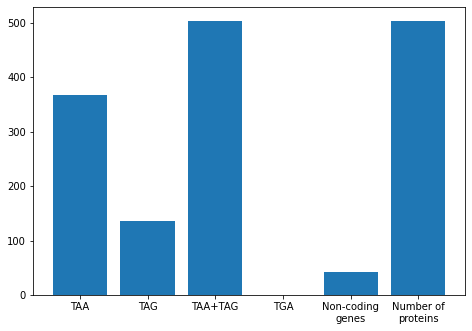

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
codon_type = ['TAA', 'TAG', 'TAA+TAG', 'TGA', 'Non-coding\ngenes', 'Number of\nproteins']
gene_count = [taa,tag,both,tga,others,503]
ax.bar(codon_type,gene_count)
plt.show()